## EDA:

For a 24 month timespan (1 January 2019 - 31 December 2021)
* What were the review counts by year? Was there a difference in number of reviews submitted in 2019 (pre-pandemic) and 2020 (during pandemic)? 
* What were the review counts by Rating?
* What are the monthly review counts over time? Consider total reviews and reviews by rating.
* When examining the number of reviews per month, were there more reviews submitted for any months in 2020 (during pandemic)?
* What are the top 30 words used in 5 star ratings?
* What are the top 30 words used in 2 and 1 star ratings?

In [10]:
# Import the required libraries
import pandas as pd
import numpy as np
import scipy.stats as scs
import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn as sns

%matplotlib inline

In [11]:
# Functions
def show_bar_plot(my_data, my_figsize, my_color, my_titletext, my_xlabeltext, my_ylabeltext, display_percent=False):
    my_data.plot.bar(fontsize=12, rot=30, alpha=0.85, figsize=my_figsize, color=my_color)
    plt.title(my_titletext, size='14')
    plt.xlabel(my_xlabeltext, size='12')
    plt.ylabel(my_ylabeltext, size='12')
    plt.yticks(size=12)
    bar_labels = my_data.values
  
    for i in range(len(my_data.values)):
        the_bar_label = bar_labels[i]
        if display_percent:
            the_bar_label = get_pretty_percent(bar_labels[i], reviews_df.shape[0])
        plt.text(x=i, y=bar_labels[i], s=the_bar_label, size=12, rotation=20, color='black')
    plt.show()


def show_unstackedbar_plot(my_data, my_figsize, my_colormap, my_titletext, my_xlabeltext, my_ylabeltext):
    my_data.unstack().plot.bar(fontsize=12, rot=30, alpha=0.85, figsize=my_figsize, colormap=my_colormap)
    plt.grid(color='black', alpha=0.1, linestyle ='-', linewidth=1)
    plt.title(my_titletext, size='14')
    plt.xlabel(my_xlabeltext, size='12')
    plt.ylabel(my_ylabeltext, size='12')
    plt.yticks(size=12)
    plt.show()

def get_pretty_percent(x, y):
    percentage = round(x/y, 3)
    return "{:.1%}".format(percentage)


In [12]:
# Read in the collected and prepared data
cookpad_reviews_df = pd.read_csv('../data/cookpad_recent_reviews.csv')
cookpad_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4276 entries, 0 to 4275
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              4276 non-null   object
 1   userName              4276 non-null   object
 2   content               4276 non-null   object
 3   score                 4276 non-null   int64 
 4   reviewCreatedVersion  4276 non-null   object
 5   reviewTimestamp       4276 non-null   object
 6   replyContent          20 non-null     object
 7   repliedAt             20 non-null     object
 8   reviewYear            4276 non-null   int64 
 9   reviewDateString      4276 non-null   object
dtypes: int64(2), object(8)
memory usage: 334.2+ KB


In [13]:
# min and max year for Review - Assuming time is in GMT. Verify this if possible.
print('min review time')
print(cookpad_reviews_df['reviewYear'].min())
print(cookpad_reviews_df['reviewTimestamp'].min())

print('max review time')
print(cookpad_reviews_df['reviewYear'].max())
print(cookpad_reviews_df['reviewTimestamp'].max())

min review time
2019
2019-01-01 04:27:45
max review time
2021
2021-04-02 09:25:12


In [14]:
# select the reviews within our desired timeframe 24 month timespan (1 January 2019 - 31 December 2021)
reviews_df = cookpad_reviews_df[(cookpad_reviews_df['reviewTimestamp'] >= '2019-01-01') & 
                                (cookpad_reviews_df['reviewTimestamp'] <=  '2020-12-31')]
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3943 entries, 333 to 4275
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              3943 non-null   object
 1   userName              3943 non-null   object
 2   content               3943 non-null   object
 3   score                 3943 non-null   int64 
 4   reviewCreatedVersion  3943 non-null   object
 5   reviewTimestamp       3943 non-null   object
 6   replyContent          19 non-null     object
 7   repliedAt             19 non-null     object
 8   reviewYear            3943 non-null   int64 
 9   reviewDateString      3943 non-null   object
dtypes: int64(2), object(8)
memory usage: 338.9+ KB


In [15]:
print('min review time')
print(reviews_df['reviewTimestamp'].min())

print('max review time')
print(reviews_df['reviewTimestamp'].max())

min review time
2019-01-01 04:27:45
max review time
2020-12-30 23:31:13


### General EDA 

#### Questions: What were the review counts by year? Was there a difference in number of reviews submitted in 2019 (pre-pandemic) and 2020 (during pandemic)? 

#### Answer: Counts are below. There were more reviews submitted in 2019 than in 2020. This disproved my hypothesis that the review count might be higher in 2020 (due to an increase in people staying at home due to the the pandemic).

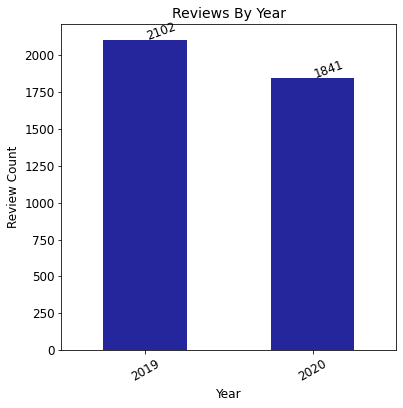

In [16]:
by_year = reviews_df.groupby(['reviewYear'])['reviewId'].count()
by_year.sort_index()

show_bar_plot(my_data=by_year, 
              my_figsize=(6,6), 
              my_color='darkblue', 
              my_titletext='Reviews By Year', 
              my_xlabeltext='Year',
              my_ylabeltext='Review Count')


#### Question: What were the review counts by Rating?

#### Answer: 80% of reviews were 5 star reviews. People who took the time to submit a rating on Google Play really love this app!

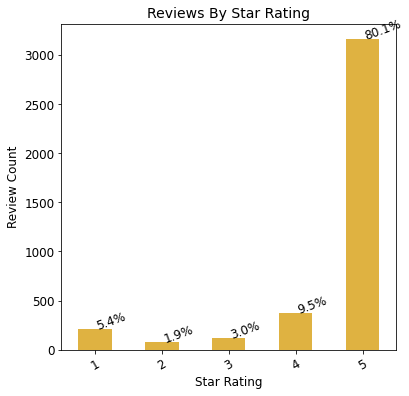

In [17]:
by_rating = reviews_df.groupby(['score'])['reviewId'].count()
by_rating.sort_index()

show_bar_plot(my_data=by_rating, 
              my_figsize=(6,6), 
              my_color='goldenrod', 
              my_titletext='Reviews By Star Rating', 
              my_xlabeltext='Star Rating',
              my_ylabeltext='Review Count',
              display_percent=True)

#### Question: What are the monthly review counts over time? Consider total reviews and reviews by rating.

#### Answer: Trends for monthly review counts are below. August 2019 and October 2019 showed spikes/increases in total reviews.  March, April, and May 2020 showed a spike/increase in total reviews.

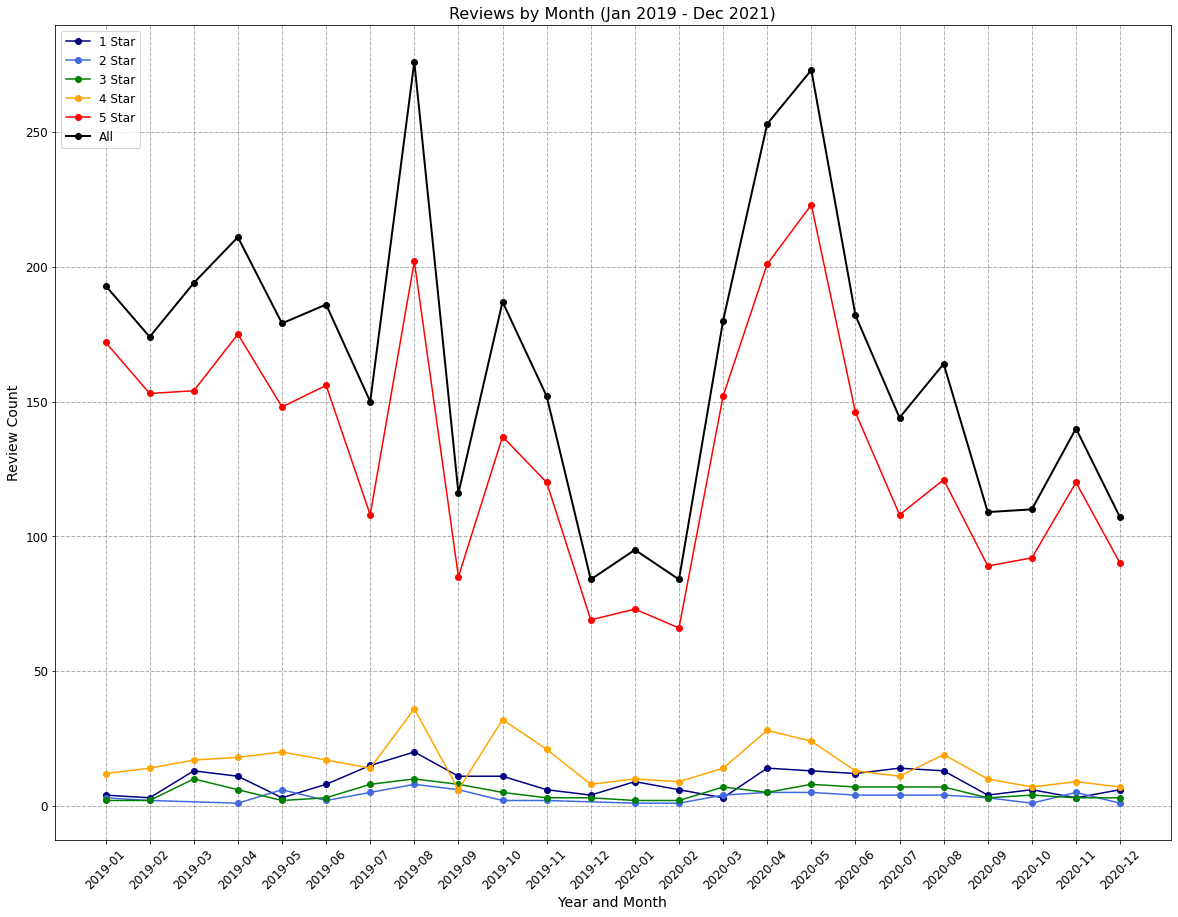

In [18]:

star1_reviews_by_ym  = reviews_df[reviews_df['score'] == 1].groupby(['reviewDateString'])['reviewId'].count()
star2_reviews_by_ym = reviews_df[reviews_df['score'] == 2].groupby(['reviewDateString'])['reviewId'].count()
star3_reviews_by_ym  = reviews_df[reviews_df['score'] == 3].groupby(['reviewDateString'])['reviewId'].count()
star4_reviews_by_ym  = reviews_df[reviews_df['score'] == 4].groupby(['reviewDateString'])['reviewId'].count()
star5_reviews_by_ym  = reviews_df[reviews_df['score'] == 5].groupby(['reviewDateString'])['reviewId'].count()
all_reviews_by_ym = reviews_df.groupby(['reviewDateString'])['reviewId'].count()


plt.rc('font', size=14) #controls default text size
plt.rc('axes', titlesize=16) #fontsize of the title
plt.rc('axes', labelsize=14) #fontsize of the x and y labels
plt.rc('xtick', labelsize=12) #fontsize of the x tick labels
plt.rc('ytick', labelsize=12) #fontsize of the y tick labels
plt.rc('legend', fontsize=12) #fontsize of the legend

plt.figure(figsize=(20, 15))
plt.plot(star1_reviews_by_ym.index, star1_reviews_by_ym, color='navy', linewidth=1.5, marker='o', linestyle='solid')
plt.plot(star2_reviews_by_ym.index, star2_reviews_by_ym, color='royalblue', linewidth=1.5, marker='o', linestyle='solid')
plt.plot(star3_reviews_by_ym.index, star3_reviews_by_ym, color='green', linewidth=1.5, marker='o', linestyle='solid')
plt.plot(star4_reviews_by_ym.index, star4_reviews_by_ym, color='orange', linewidth=1.5, marker='o', linestyle='solid')
plt.plot(star5_reviews_by_ym.index, star5_reviews_by_ym, color='red', linewidth=1.5, marker='o', linestyle='solid')
plt.plot(all_reviews_by_ym.index, all_reviews_by_ym, color='black', linewidth=2.0, marker='o', linestyle='solid')
plt.xticks(rotation=45)
plt.grid(color = 'black', alpha = 0.3, linestyle = '--', linewidth = 1)

plt.title('Reviews by Month (Jan 2019 - Dec 2021)')
plt.xlabel('Year and Month')
plt.ylabel('Review Count')
plt.legend(['1 Star','2 Star','3 Star','4 Star', '5 Star', 'All'], loc=2)

plt.show()

In [11]:
reviews_df['reviewTimestamp'] = pd.to_datetime(reviews_df['reviewTimestamp'])
reviews_df['reviewMonth'] = reviews_df.apply(lambda row: row['reviewTimestamp'].month, axis=1)

reviews_df.head(3)

,reviewId,userName,content,score,reviewCreatedVersion,reviewTimestamp,replyContent,repliedAt,reviewYear,reviewDateString,reviewMonth
333,gp:AOqpTOEOagbOfS9Lp6N7C0dtdhjwqA4LSNXQIUQ9jNr...,Sudha vasani,Awesome,5,2.182.1.0-android,2020-12-30 23:31:13,NaN,NaN,2020,2020-12,12
334,gp:AOqpTOH91LKxJgylZ5ToRMFhF5VEvV2yIE-qrganxd-...,Ida Bagus Putra Dwipayana,Thank you very much for the contents,5,2.182.1.0-android,2020-12-30 17:50:12,NaN,NaN,2020,2020-12,12
335,gp:AOqpTOFOZbUajhkNniKxwBj3tykMRYj0hDmnMNja1O0...,Indri Tamara,Masak menjadi mudah,5,2.178.1.0-android,2020-12-30 17:39:40,NaN,NaN,2020,2020-12,12


In [12]:
unstacked_bar_df = reviews_df.groupby(['reviewMonth', 'reviewYear'])['reviewId'].count()

#### From a prior chart, we saw that there were fewer total reviews submitted in 2020 than in 2019.

#### Question: When examining the number of reviews per month, were there more reviews submitted for any months in 2020 (during pandemic)

####  Answer: April, May and December 2020 review counts were greater than the counts for 2019. Perhaps this increase may be due to more people staying at home and using the app for practical and hobby cooking. March, June, July and September 2020 review counts were less than the counts in 2019, but are fairly close.

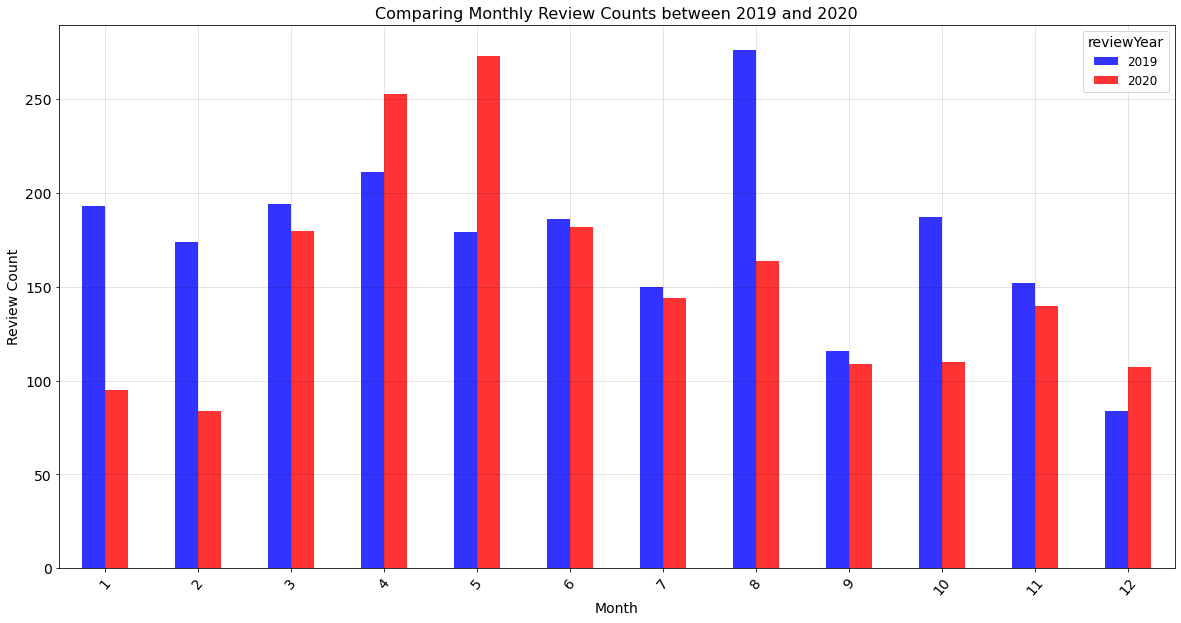

In [13]:
unstacked_bar_df.unstack().plot.bar(fontsize=14, rot=50, alpha = 0.80, figsize=(20,10), colormap='bwr', title='Comparing Monthly Review Counts between 2019 and 2020')
plt.grid(color = 'black', alpha = 0.1, linestyle = '-', linewidth = 1)
plt.xlabel('Month')
plt.ylabel('Review Count')
plt.show()

#### Simple Text Analysis

In [14]:
from myFunctions import process_text
from myFunctions import get_eng_stopwords_list
from myFunctions import plot_word_cloud

In [23]:
# Create word clouds of the most common words in 5 star Reviews and >3 star Reviews
eng_stopwords = get_eng_stopwords_list()
top_rated_review_words = list()
low_rated_review_words = list()

for rev in reviews_df[reviews_df['score'] == 5]['content'].to_list():
    processed_review = process_text(rev, eng_stopwords)
    for word in processed_review:
        top_rated_review_words.append(word)

for rev in reviews_df[reviews_df['score'] < 3]['content'].to_list():
    processed_review = process_text(rev, eng_stopwords)
    for word in processed_review:
        low_rated_review_words.append(word)

#### Question: What are the top 30 mentioned words in 5 star reviews? 

#### Answer: As expected, the terms "cookpad" and "app" show up often in the reviews. These terms, while used very often, are not very informative. More informative words/terms are "good", "recipe", "helpful", "love", "easy", "menu", and "useful".  

NOTE: There are a mix of English and non-English words which needs further analysis.

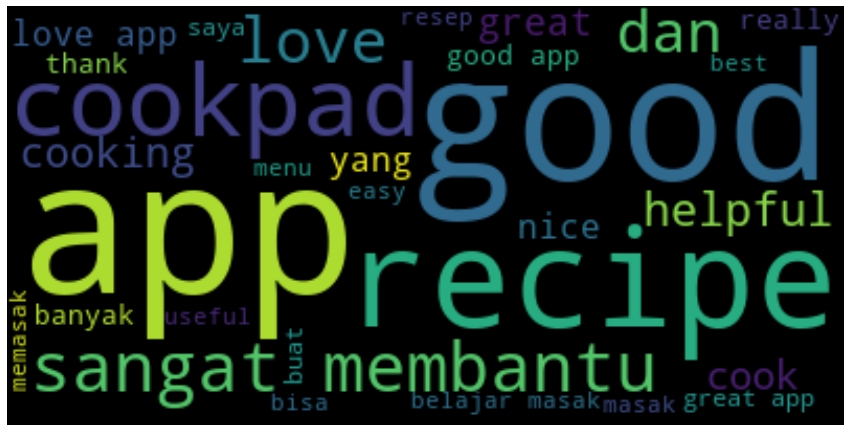

In [19]:
high_rating_text = ' '.join(word for word in top_rated_review_words)
plot_word_cloud(text=high_rating_text, word_max=30)

#### Question: What are the top 30 mentioned words in 1 and 2 star reviews? 

#### Answer: As expected, the terms "cookpad" and "app" show up often in the reviews. These terms, while used very often, are not very informative. More informative words/terms are "recipe', "update", "version", "new", "log", "premium", "account","search", "find", "need", and "want".  

NOTE: There are a mix of English and non-English words which needs further analysis.

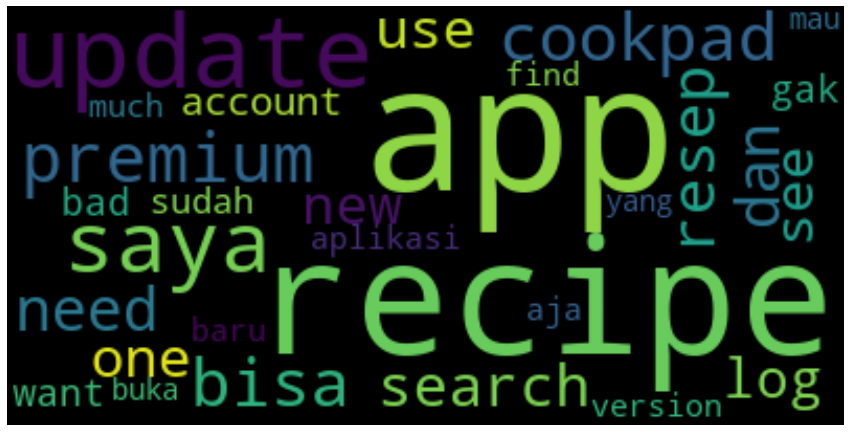

In [24]:
low_rating_text = ' '.join(word for word in low_rated_review_words)
plot_word_cloud(text=low_rating_text, word_max=30)